In [84]:
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [85]:
img = cv.imread("Capture.PNG")

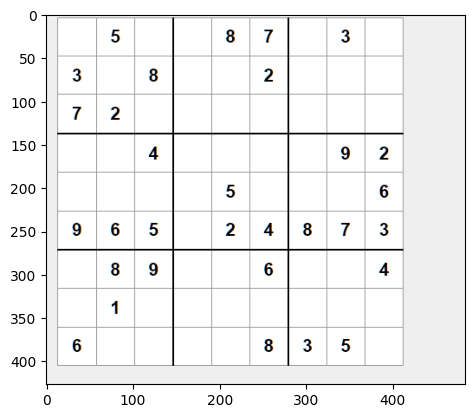

In [86]:
plt.imshow(img)

In [87]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

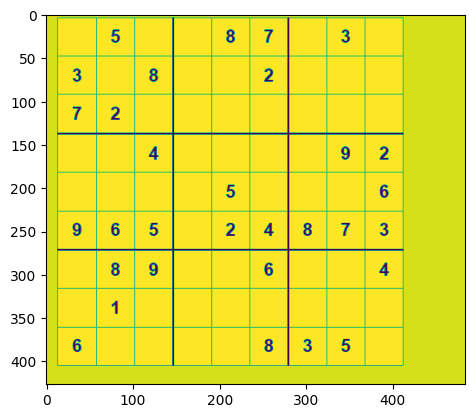

In [88]:
plt.imshow(img_gray)

In [89]:
edged = cv.Canny(img_gray, 170, 490)

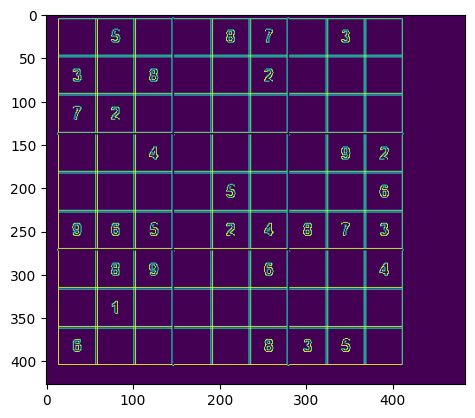

In [90]:
plt.imshow(edged)

In [91]:
contours, _ = cv.findContours(edged, cv.RETR_EXTERNAL, 
                               cv.CHAIN_APPROX_SIMPLE)

In [92]:
img_out = img.copy()
w, h = img.shape[1], img.shape[0]
for cntr in contours:
    imgx, imgy, imgw, imgh = cv.boundingRect(cntr)
    if imgw < w/5 or imgw < h/5 or imgw/imgh < 0.25 or imgw/imgh > 1.5:
        continue
  # Approximate the contour with 4 points
    peri = cv.arcLength(cntr, True)
    frm = cv.approxPolyDP(cntr, 0.1*peri, True)
    if len(frm) != 4:
        continue

  # Converted image should fit into the original size
    board_size = max(imgw, imgh)
    if imgx + board_size >= w or imgy + board_size >= h:
        continue
  # Points should not be too close to each other 
  # (use euclidian distance)
    if cv.norm(frm[0][0] - frm[1][0], cv.NORM_L2) < 0.1*peri or \
        cv.norm(frm[2][0] - frm[1][0], cv.NORM_L2) < 0.1*peri or \
        cv.norm(frm[3][0] - frm[1][0], cv.NORM_L2) < 0.1*peri or \
        cv.norm(frm[3][0] - frm[2][0], cv.NORM_L2) < 0.1*peri:
        continue

    cv.line(img_out, frm[0][0], frm[1][0], (0, 200, 0), thickness=3)
    cv.line(img_out, frm[1][0], frm[2][0], (0, 200, 0), thickness=3)
    cv.line(img_out, frm[2][0], frm[3][0], (0, 200, 0), thickness=3)
    cv.line(img_out, frm[0][0], frm[3][0], (0, 200, 0), thickness=3)    

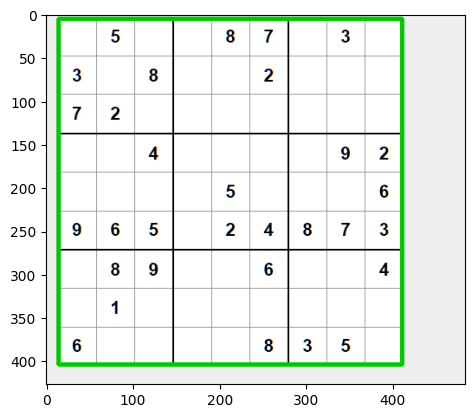

In [93]:
plt.imshow(img_out)

In [94]:
imagenprueba = img_out[frm[0][0][1]:frm[1][0][1],frm[1][0][0]:frm[2][0][1]]

In [95]:
imagenprueba = cv.cvtColor(imagenprueba, cv.COLOR_BGR2GRAY)

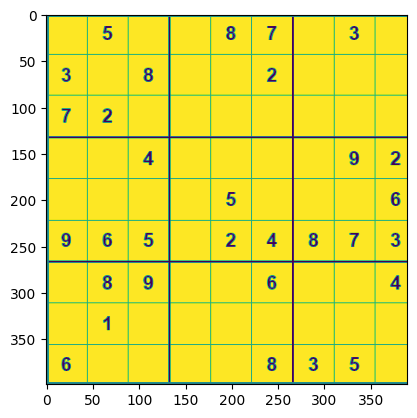

In [96]:
plt.imshow(imagenprueba)

In [97]:
imagenprueba.shape

(399, 390)

In [98]:
images = []
cell_w, cell_h = imagenprueba.shape[1]//9,imagenprueba.shape[0]//9
for x in range(9):
    for y in range(9):
        x1, y1 = x*cell_w, y*cell_h 
        x2, y2 = (x + 1)*cell_w, (y + 1)*cell_h
        cx, cy = (x1 + x2)//2, (y1 + y2)//2 
        w2, h2 = cell_w, cell_h      
        crop = imagenprueba[y1+10:y2-5, x1+10:x2-5]
        images.append(np.concatenate((np.expand_dims(crop, axis = 2),np.expand_dims(crop, axis = 2),np.expand_dims(crop, axis = 2)),axis = 2))  

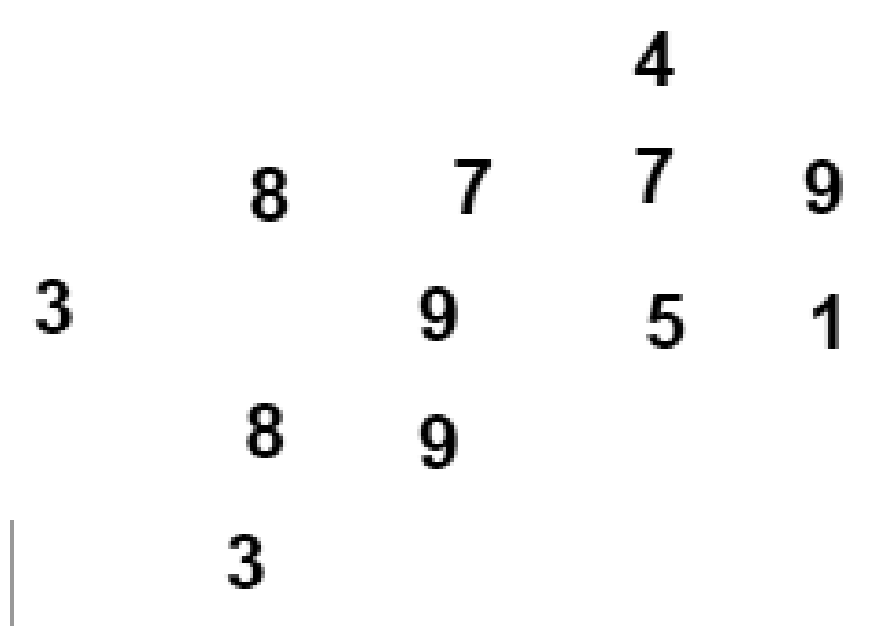

In [101]:
fig, axs = plt.subplots(5, 5, figsize=(12,8))
for row in range(5):
    for col in range(5):
        img_idx = np.random.randint(80)        
        axs[row, col].imshow(images[img_idx])
        axs[row, col].axis('off')        

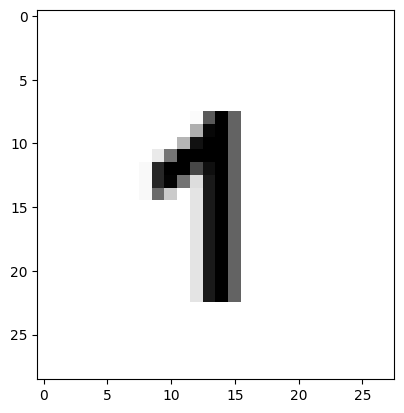

In [105]:
plt.imshow(images[16])

In [106]:
import shutil

for i in range(1000):
    shutil.copy2('Data/1/1.png', 'Data/1/pic' + str(i) + '.png')

In [ ]:
import pickle
with open('digits.pkl', 'wb') as f:
        pickle.dump(np.array(images), f)